In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import tensorflow_datasets as tfds

In [4]:
ds,ds_info=tfds.load('food101',shuffle_files=True,as_supervised=True,with_info=True)

In [5]:
train_ds,valid_ds=ds['train'],ds['validation']

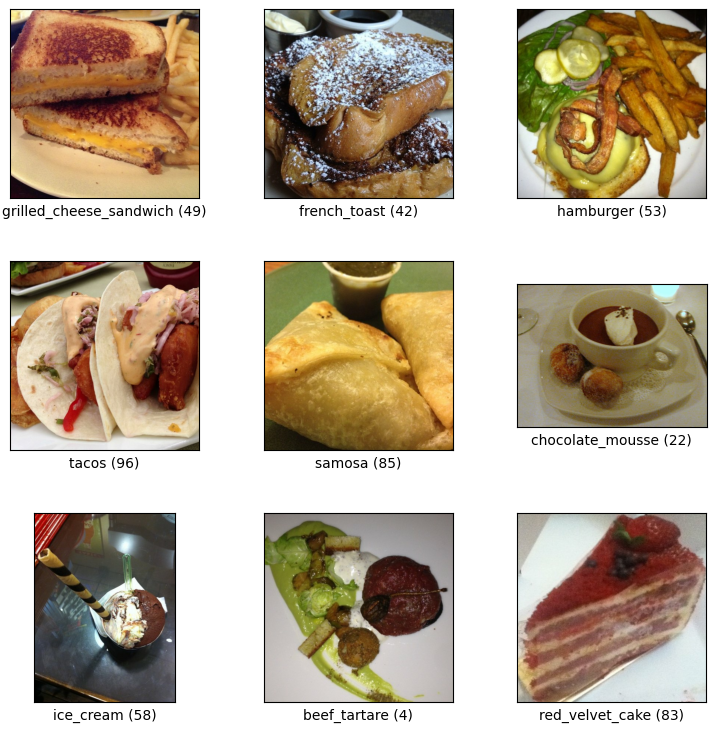

In [6]:
fig=tfds.show_examples(train_ds,ds_info)

In [7]:
MAX_SIDE_LEN=128
HOT_DOG_CLASS=55

train_ds=train_ds.map(
    lambda image,label : (tf.cast(tf.image.resize(image,[MAX_SIDE_LEN,MAX_SIDE_LEN]),dtype=tf.int32),tf.cast(label == HOT_DOG_CLASS,tf.int32))
)

valid_ds=valid_ds.map(
    lambda image,label : (tf.cast(tf.image.resize(image,[MAX_SIDE_LEN,MAX_SIDE_LEN]),dtype=tf.int32),tf.cast(label == HOT_DOG_CLASS,tf.int32))
)

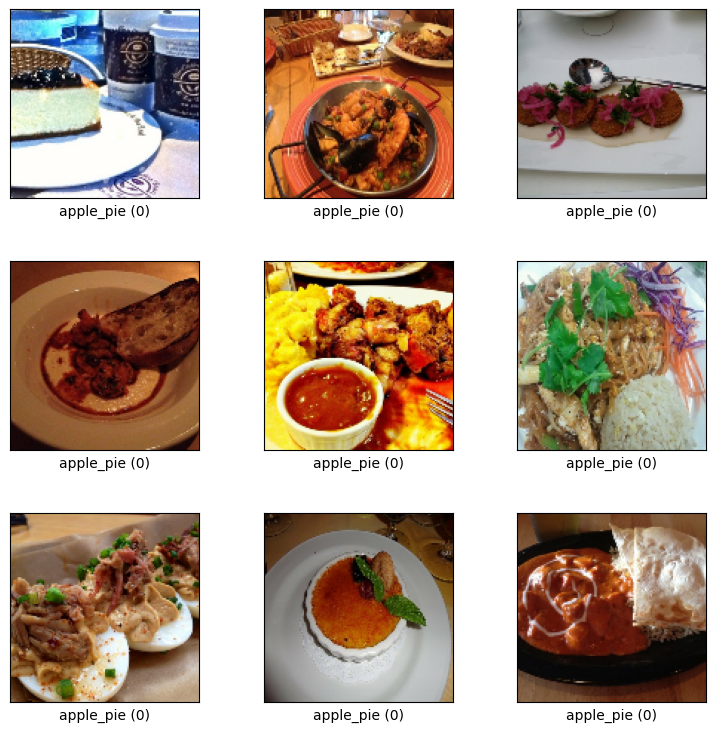

In [8]:
fig=tfds.show_examples(train_ds,ds_info)

In [9]:
train_hd_size,valid_hd_size=750,250
train_hotdogs=train_ds.filter(lambda image,label: label == 1).repeat(3)
train_nothotdogs=train_ds.filter(lambda image,label: label == 0)


In [10]:

valid_hotdogs=valid_ds.filter(lambda image,label: label == 1).repeat(3)
valid_nothotdogs=valid_ds.filter(lambda image,label: label == 0)


In [12]:
batch_size=16

train_ds=tf.data.Dataset.sample_from_datasets([train_hotdogs,train_nothotdogs],[0.5,0.5],stop_on_empty_dataset=True)
train_ds=train_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

valid_ds=tf.data.Dataset.sample_from_datasets([valid_hotdogs,valid_nothotdogs],[0.5,0.5],stop_on_empty_dataset=True)
valid_ds=valid_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [13]:
for image_batch,label_batch in train_ds.take(1):
  print(image_batch)
  print(label_batch)

tf.Tensor(
[[[[ 21  25  30]
   [ 23  25  30]
   [ 23  24  28]
   ...
   [ 37  35  48]
   [ 45  40  53]
   [ 56  41  53]]

  [[ 26  27  31]
   [ 23  23  28]
   [ 26  25  31]
   ...
   [ 37  36  47]
   [ 42  40  50]
   [ 52  43  51]]

  [[ 37  30  29]
   [ 34  27  27]
   [ 35  29  32]
   ...
   [ 42  39  50]
   [ 40  36  45]
   [ 48  43  49]]

  ...

  [[145  93  90]
   [144  89  88]
   [146  87  86]
   ...
   [ 33  25  36]
   [ 44  41  49]
   [ 42  39  43]]

  [[150  97  95]
   [143  88  86]
   [147  88  88]
   ...
   [ 45  34  43]
   [ 49  42  51]
   [ 61  55  61]]

  [[152  99  97]
   [148  93  92]
   [152  93  93]
   ...
   [ 50  34  44]
   [ 43  31  41]
   [ 51  39  47]]]


 [[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [101 116 123]
   [124 137 145]
   [141 152 156]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [ 80  95 102]
   [ 94 107 115]
   [107 118 122]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [136 146 147]
   [138 149 153]


In [14]:
random.seed(0)
model=models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=[MAX_SIDE_LEN,MAX_SIDE_LEN,3]))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1))

In [16]:
lr=0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs=50
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=epochs,
    verbose=1
)

Epoch 1/50
283/283 [==============================] - 879s 3s/step - loss: 0.6637 - accuracy: 0.5509 - val_loss: 0.6162 - val_accuracy: 0.6279
Epoch 2/50
283/283 [==============================] - 396s 1s/step - loss: 0.5743 - accuracy: 0.6621 - val_loss: 0.5944 - val_accuracy: 0.6671
Epoch 3/50
283/283 [==============================] - 406s 1s/step - loss: 0.4781 - accuracy: 0.7461 - val_loss: 0.6124 - val_accuracy: 0.6715
Epoch 4/50
283/283 [==============================] - 405s 1s/step - loss: 0.3677 - accuracy: 0.8210 - val_loss: 0.6275 - val_accuracy: 0.6860
Epoch 5/50
283/283 [==============================] - 409s 1s/step - loss: 0.2656 - accuracy: 0.8815 - val_loss: 0.6945 - val_accuracy: 0.6886
Epoch 6/50
283/283 [==============================] - 410s 1s/step - loss: 0.1885 - accuracy: 0.9280 - val_loss: 1.0125 - val_accuracy: 0.6241
Epoch 7/50
283/283 [==============================] - 407s 1s/step - loss: 0.1335 - accuracy: 0.9515 - val_loss: 1.1800 - val_accuracy: 0.6292